## Import Packages

In [1]:
import cv2
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from skimage import exposure, util

## Function Implementation

In [2]:
def read_dcm(filename):
    '''
    Function required to read image array from dicom file
    input: filename
    output: image array
    '''
    ds = pydicom.dcmread(filename)
    img = np.array(ds.pixel_array)
    return img

In [3]:
def convert_image(image, from_bits, to_bits):
    '''
    Function to convert image from scale to another scale (i.e. 14bits to 8bits)
    input: 
            - image array
            - bits want to convert from 
            - bits want to scale to
            
    outpt: converted image
    '''
    image = image * ((2**to_bits)/(2**from_bits))
    return image

In [4]:
def apply_log_transform(image):
    '''
    Function that apply log transformation to an image
    input: image
    output: log image
    '''
    val = image.max()
    c =  val / np.log(1 + np.max(image))
    log_image = c * (np.log(image + 1))
    return log_image

In [5]:
def apply_histogram_equalization(image):
    '''
    Function that apply Histogram Equaltization to image
    input: image
    output: equalized image
    '''
    equalized_img = cv2.equalizeHist(log_img)
    return equalized_img

In [6]:
def apply_CLAHE(log_img, cLimit=5, gridSize=(4, 4)):
    '''
    Function that apply CLAHE to image
    input: image
    output: equalized image 
    '''
    clahe = cv2.createCLAHE(clipLimit=cLimit, tileGridSize=gridSize)
    equalized_img = clahe.apply(log_img)
    return equalized_img

In [7]:
def apply_contrast_stretching(image, inRange=(0, 120)):
    '''
    Function that apply Contrast Stretching to an image
    input: image
    output: enhanced image
    '''
    image = exposure.rescale_intensity(image, in_range=inRange)
    image = util.invert(image)
    return image

In [8]:
def plot_histogram(image, minVal=0, maxVal=256, rangeVal=[10, 256]):
    '''
    Function that plot histogram of image
    input: 
            - image array
            - minimum value:
            - maximum value: 
            - range value: range to plot histogram
            
    output: histogram plot
    '''
    histr = cv2.calcHist([image], [minVal], None, [maxVal], rangeVal)
    plt.plot(histr)
    plt.show()

In [9]:
def plot_image(image, figSize=(10, 4)):
    '''
    Function that plot image
    '''
    plt.figure(figsize=figSize)
    plt.imshow(image, cmap='gray')
    plt.show()

In [96]:
def compare_images(image1, image2, image3, titles, figSize=(16, 12)):
    fig = plt.figure(figsize=figSize)
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.title.set_text(titles[0])
    ax1.imshow(image1, cmap='gray')
    #
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.title.set_text(titles[1])
    ax2.imshow(image2, cmap='gray')
    #
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.title.set_text(titles[2])
    ax3.imshow(image3, cmap='gray')
    
    plt.show()

## Apply Image Processing Techniques

#### Image Read

In [97]:
raw_image = read_dcm('MAMMOGRAPHY_RAW.dcm')
present_image = read_dcm('MAMMOGRAPHY_PRESENTATION.dcm')

#### Convert 14bits image to 8bits

In [98]:
converted_img = convert_image(raw_image, from_bits=14, to_bits=8)

#### Log Transformation

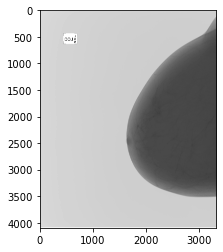

In [99]:
log_img = apply_log_transform(converted_img)
plot_image(log_img)

### Method 1
   1. **Apply Historgram Equalization**
   2. **Contrast Stretching**

#### Histogram Equalization

In [100]:
log_img = log_img.astype(np.uint8)
equalized_img = apply_histogram_equalization(log_img)
# plot_image(equalized_img)

#### Contrast Stretching

In [101]:
final_image = apply_contrast_stretching(equalized_img, inRange=(0, 120))
# plot_image(final_image)

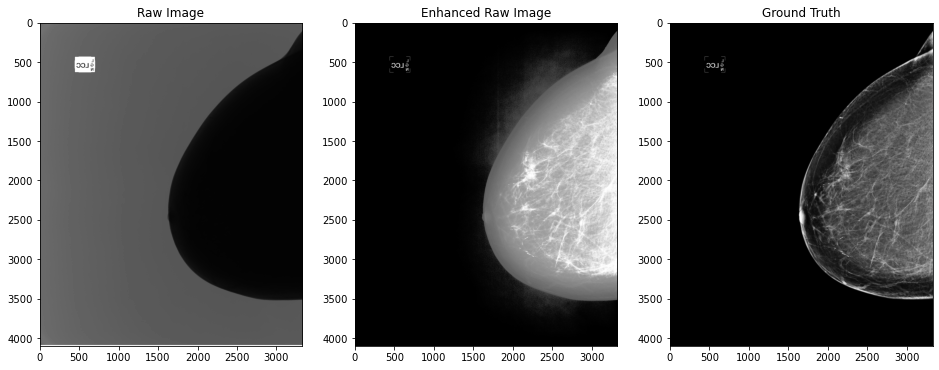

In [102]:
titles = ['Raw Image', 'Enhanced Raw Image', 'Ground Truth']
compare_images(raw_image, final_image, present_image, titles)

> Comment:

### Method 2
   1. **Apply CLAHE**
   2. **Contrast Stretching**

#### Contrast Limited Adaptive Histogram Equalization (CLAHE)

In [103]:
equalized_img = apply_CLAHE(log_img, cLimit=5, gridSize=(4, 4))
# plot_image(equalized_img)

#### Contrast Stretching

In [104]:
final_image = apply_contrast_stretching(equalized_img, inRange=(0, 120))
# plot_image(final_image, figSize=(12, 5))

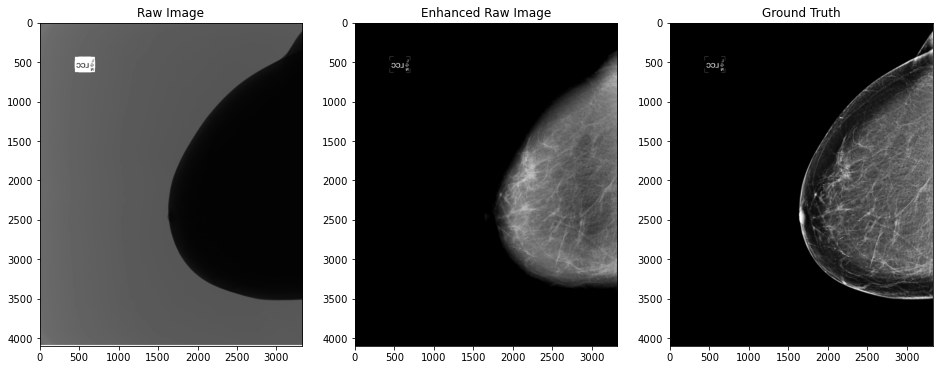

In [105]:
titles = ['Raw Image', 'Enhanced Raw Image', 'Ground Truth']
compare_images(raw_image, final_image, present_image, titles)

> Comment:

### References
- https://www.pyimagesearch.com/2021/02/01/opencv-histogram-equalization-and-adaptive-histogram-equalization-clahe/
- https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html